# Analysing results for general experiment (series of n)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
experiment_id = "full_run"
filename_results = f"results_experiment_{experiment_id}.json"

df_results = pd.read_json(f"../data/{filename_results}")
# df_results.loc[df_results["status"].isnull(), "status"] = "Optimal"

In [3]:
df_results.head()

,experiment_id,tindar_id,n,connectedness,p,solver,status,objective_value,time
0,full_run,0,10,1,0.12125,heuristic,Solved (optimal unsure),0,0.001328
1,full_run,1,10,1,0.12125,heuristic,Solved (optimal unsure),2,0.000718
2,full_run,2,10,1,0.12125,heuristic,Solved (optimal unsure),0,0.000612
3,full_run,3,10,1,0.12125,heuristic,Solved (optimal unsure),0,0.001138
4,full_run,4,10,1,0.12125,heuristic,Solved (optimal unsure),2,0.001962


## Data Validation

In [4]:
num_solvers = len(df_results["solver"].unique())

if num_solvers == 1:
    assert (df_results["tindar_id"].value_counts() == 1).all()

elif num_solvers == 2:
    assert (df_results["tindar_id"].value_counts() == 2).all()

else:
    raise Exception(f"Data says {num_solvers} solvers. Only 1 or 2 allowed")



## Objective value: difference pulp & heuristic

In [5]:
def solver_difference(df_sub):
    opt = df_sub.loc[df_sub["solver"] == "pulp"]
    heur = df_sub.loc[df_sub["solver"] == "heuristic"]
    
    opt_obj = opt["objective_value"].values[0]
    heur_obj = heur["objective_value"].values[0]

    opt_solvetime = opt["time"].values[0]
    heur_solvetime = heur["time"].values[0]
    
    if opt_obj == 0:
        perc_difference = 0
    else:
        perc_difference = (opt_obj - heur_obj)/opt_obj
    
    return pd.Series({
        "objective_difference_abs": opt_obj - heur_obj,
        "objective_difference_perc": perc_difference,
        "solvetime_difference_abs": opt_solvetime - heur_solvetime,
        "solvetime_difference_perc": (opt_solvetime - heur_solvetime)/heur_solvetime,
        "n": df_sub["n"].values[0],
        "connectedness": df_sub["connectedness"].values[0],
    })

df_solver_difference = df_results.groupby(["tindar_id"]).apply(solver_difference)
df_solver_difference.head()

,objective_difference_abs,objective_difference_perc,solvetime_difference_abs,solvetime_difference_perc,n,connectedness
tindar_id,,,,,,
0,0.0,0.0,0.043021,32.392742,10.0,1.0
1,0.0,0.0,0.037378,52.065190,10.0,1.0
2,0.0,0.0,0.038898,63.528009,10.0,1.0
3,0.0,0.0,0.037374,32.841388,10.0,1.0
4,0.0,0.0,0.039163,19.959533,10.0,1.0


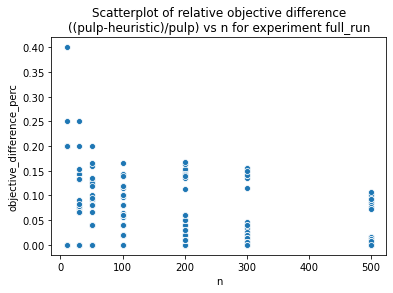

In [6]:
var_x = "n"
var_y = "objective_difference_perc"

plt.figure()
plt.title(f"Scatterplot of relative objective difference\n((pulp-heuristic)/pulp) vs {var_x} for experiment {experiment_id}")
sns.scatterplot(
    x = var_x,
    y = var_y,
    data = df_solver_difference
)
plt.savefig(f"../documentation/figures/scatterplot_{var_x}_vs_{var_y}_experiment_{experiment_id}")


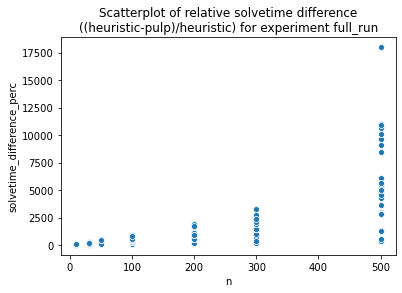

In [7]:
var_y = "solvetime_difference_perc"

plt.figure()
plt.title(f"Scatterplot of relative solvetime difference\n((heuristic-pulp)/heuristic) for experiment {experiment_id}")
sns.scatterplot(
    x = var_x,
    y = var_y,
    data = df_solver_difference
)
plt.savefig(f"../documentation/figures/scatterplot_{var_x}_vs_{var_y}_experiment_{experiment_id}")


### Heatmaps for targets vs(n, connectedness)

objective_difference_perc


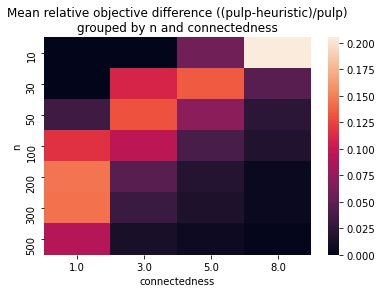

In [8]:
var_y = "objective_difference_perc"
print(var_y)
df_n_conn = df_solver_difference.groupby(["n", "connectedness"]).apply(lambda x: x[var_y].mean()).reset_index()
df_n_conn["n"] = df_n_conn["n"].astype(int)
df_n_conn.columns = list(df_n_conn.columns[:2]) + [var_y]
df_pivot = df_n_conn.pivot("n", "connectedness", var_y)

plt.figure()
plt.title(f"Mean relative objective difference ((pulp-heuristic)/pulp)\ngrouped by n and connectedness")
sns.heatmap(df_pivot)
plt.savefig(f"../documentation/figures/heatmap_{var_y}_experiment_{experiment_id}")


solvetime_difference_perc


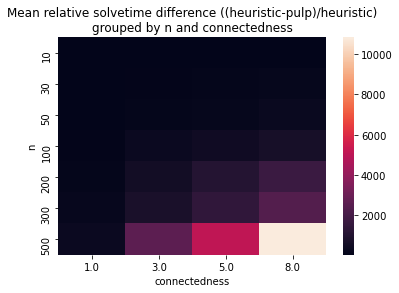

In [9]:
var_y = "solvetime_difference_perc"
print(var_y)
df_n_conn = df_solver_difference.groupby(["n", "connectedness"]).apply(lambda x: x[var_y].mean()).reset_index()
df_n_conn["n"] = df_n_conn["n"].astype(int)
df_n_conn.columns = list(df_n_conn.columns[:2]) + [var_y]
df_pivot = df_n_conn.pivot("n", "connectedness", var_y)

plt.figure()
plt.title(f"Mean relative solvetime difference ((heuristic-pulp)/heuristic)\ngrouped by n and connectedness")
sns.heatmap(df_pivot)
plt.savefig(f"../documentation/figures/heatmap_{var_y}_experiment_{experiment_id}")
